# ProsperLoan DataSet Exploration

## by MGBEKWUTE VICTOR EMEKA

## Introduction
  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load the dataset
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
prosper_loan.shape

(113937, 81)

In [4]:
# Getting information of the dataset
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
prosper_loan.head(5)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [6]:
# convert ProsperRating into ordered categorical types
ordinal_var_dict ={'ProsperRating (Alpha)': ['N/A','HR','E','D','C','B','A','AA']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    prosper_loan[var] = prosper_loan[var].astype(ordered_var)

In [7]:
# descriptive statistics for numeric variables
prosper_loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### What is the structure of your dataset?
The data set of interest has 113937 Loans with 81 columns. Out of the 81 columns, there are 61 numerical variables and 20 categorical variables.

### What is/are the main feature(s) of interest in your dataset?

I have interest in analysing the MonthlyLoanPayment, BorrowerRtae, EmploymentStausDuration, IncomeRange, OnTimeProsperPayments and ProsperRating(Alpha).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that period of employment(EmploymentStatusDuration) and the Income of the borrower will tremendeously affect the MonthlyLoanPyment which will lead to higher borrowerRate.

## Univariate Exploration


I will start my analysis by looking at the EmploymentStatusDuration

In [8]:
#Plotting Histogram with dynamic number of bins
binsize = 50
bins = np.arange(0,prosper_loan['EmploymentStatusDuration'].max()+50,50)
plt.figure(figsize =[10,5])
plt.hist(data = prosper_loan, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('EmploymentStatusDuration')
plt.ylabel('Length of EmploymentStatus')
plt.title('Duration of Employment');

The EmploymentStatusDuration is right skewed.

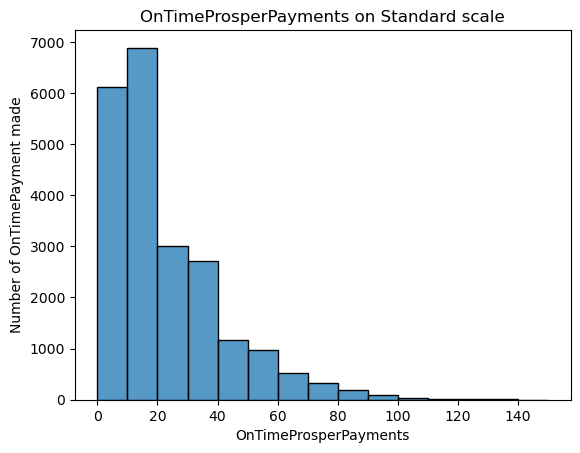

In [9]:
# A standard-scaled plot of OnTimeProsperPayment
bin_edges = np.arange(0,prosper_loan['OnTimeProsperPayments'].max()+10,10)
sb.histplot(prosper_loan['OnTimeProsperPayments'], bins = bin_edges, kde = False,)
plt.xlabel('OnTimeProsperPayments')
plt.ylabel('Number of OnTimePayment made')
plt.title('OnTimeProsperPayments on Standard scale');

The distribution is right skewed.

In [10]:
# Plot of BorrowerRate on Standard plot
sb.histplot(prosper_loan['BorrowerRate'], kde = True);

The distribution shows that we have an average borrowe rate within 0.1 to 0.3.

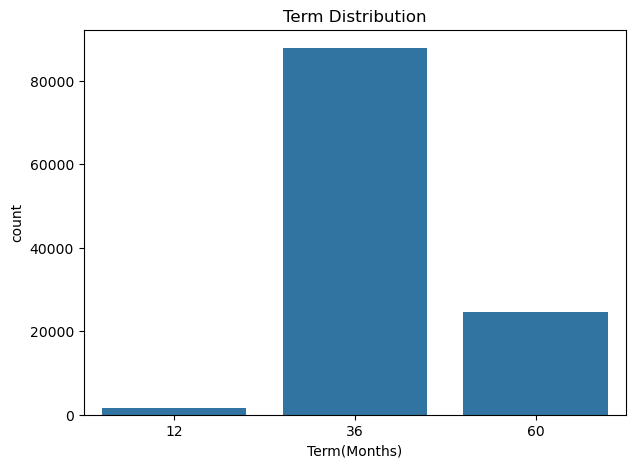

In [11]:
# plot of Term(Duration of the Loan in Month)
ax = plt.figure(figsize =[7,5])

base_color = sb.color_palette()[0]
sb.countplot(data = prosper_loan, x = 'Term', color = base_color,)
plt.title('Term Distribution')
plt.xlabel('Term(Months)');

The distribution shows that the least loan has a duration of 12 months followed by a 36 months which most loan borrower belongs to and a 60 months duration.

In [12]:
#Plot of IncomeRange
sb.countplot(data = prosper_loan, x = 'IncomeRange', color = base_color,)
plt.xticks(rotation=90);

In [13]:
sb.countplot(data = prosper_loan, x = 'ProsperRating (Alpha)', color = base_color,)
plt.xticks(rotation=90);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanOriginalAmount,MonthlyLoanPayment and EmploymentStatusDuration have their distributions skewed to the right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no unsual distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

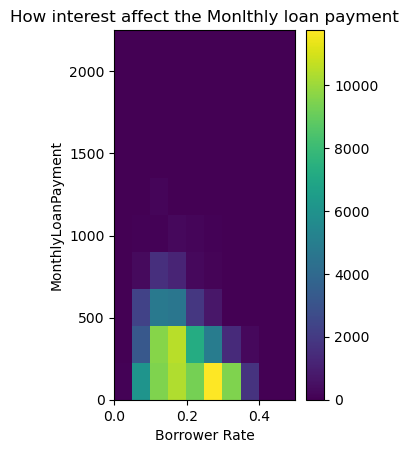

In [14]:
plt.subplot(1,2,2)
plt.hist2d(data=prosper_loan, x = 'BorrowerRate', y = 'MonthlyLoanPayment')
plt.colorbar()
plt.xlabel('Borrower Rate')
plt.ylabel('MonthlyLoanPayment')
plt.title('How interest affect the Monlthly loan payment');

The graph shows that those with smaller interest rate takes more time to pay their loan.

In [15]:
numeric_vars =  ['IncomeRange','EmploymentStatusDuration','LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment','DebtToIncomeRatio','BorrowerAPR','OnTimeProsperPayments', 'Term']
categoric_vars = ['IncomeRange']

In [16]:
# correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(data = prosper_loan[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix')
plt.show()

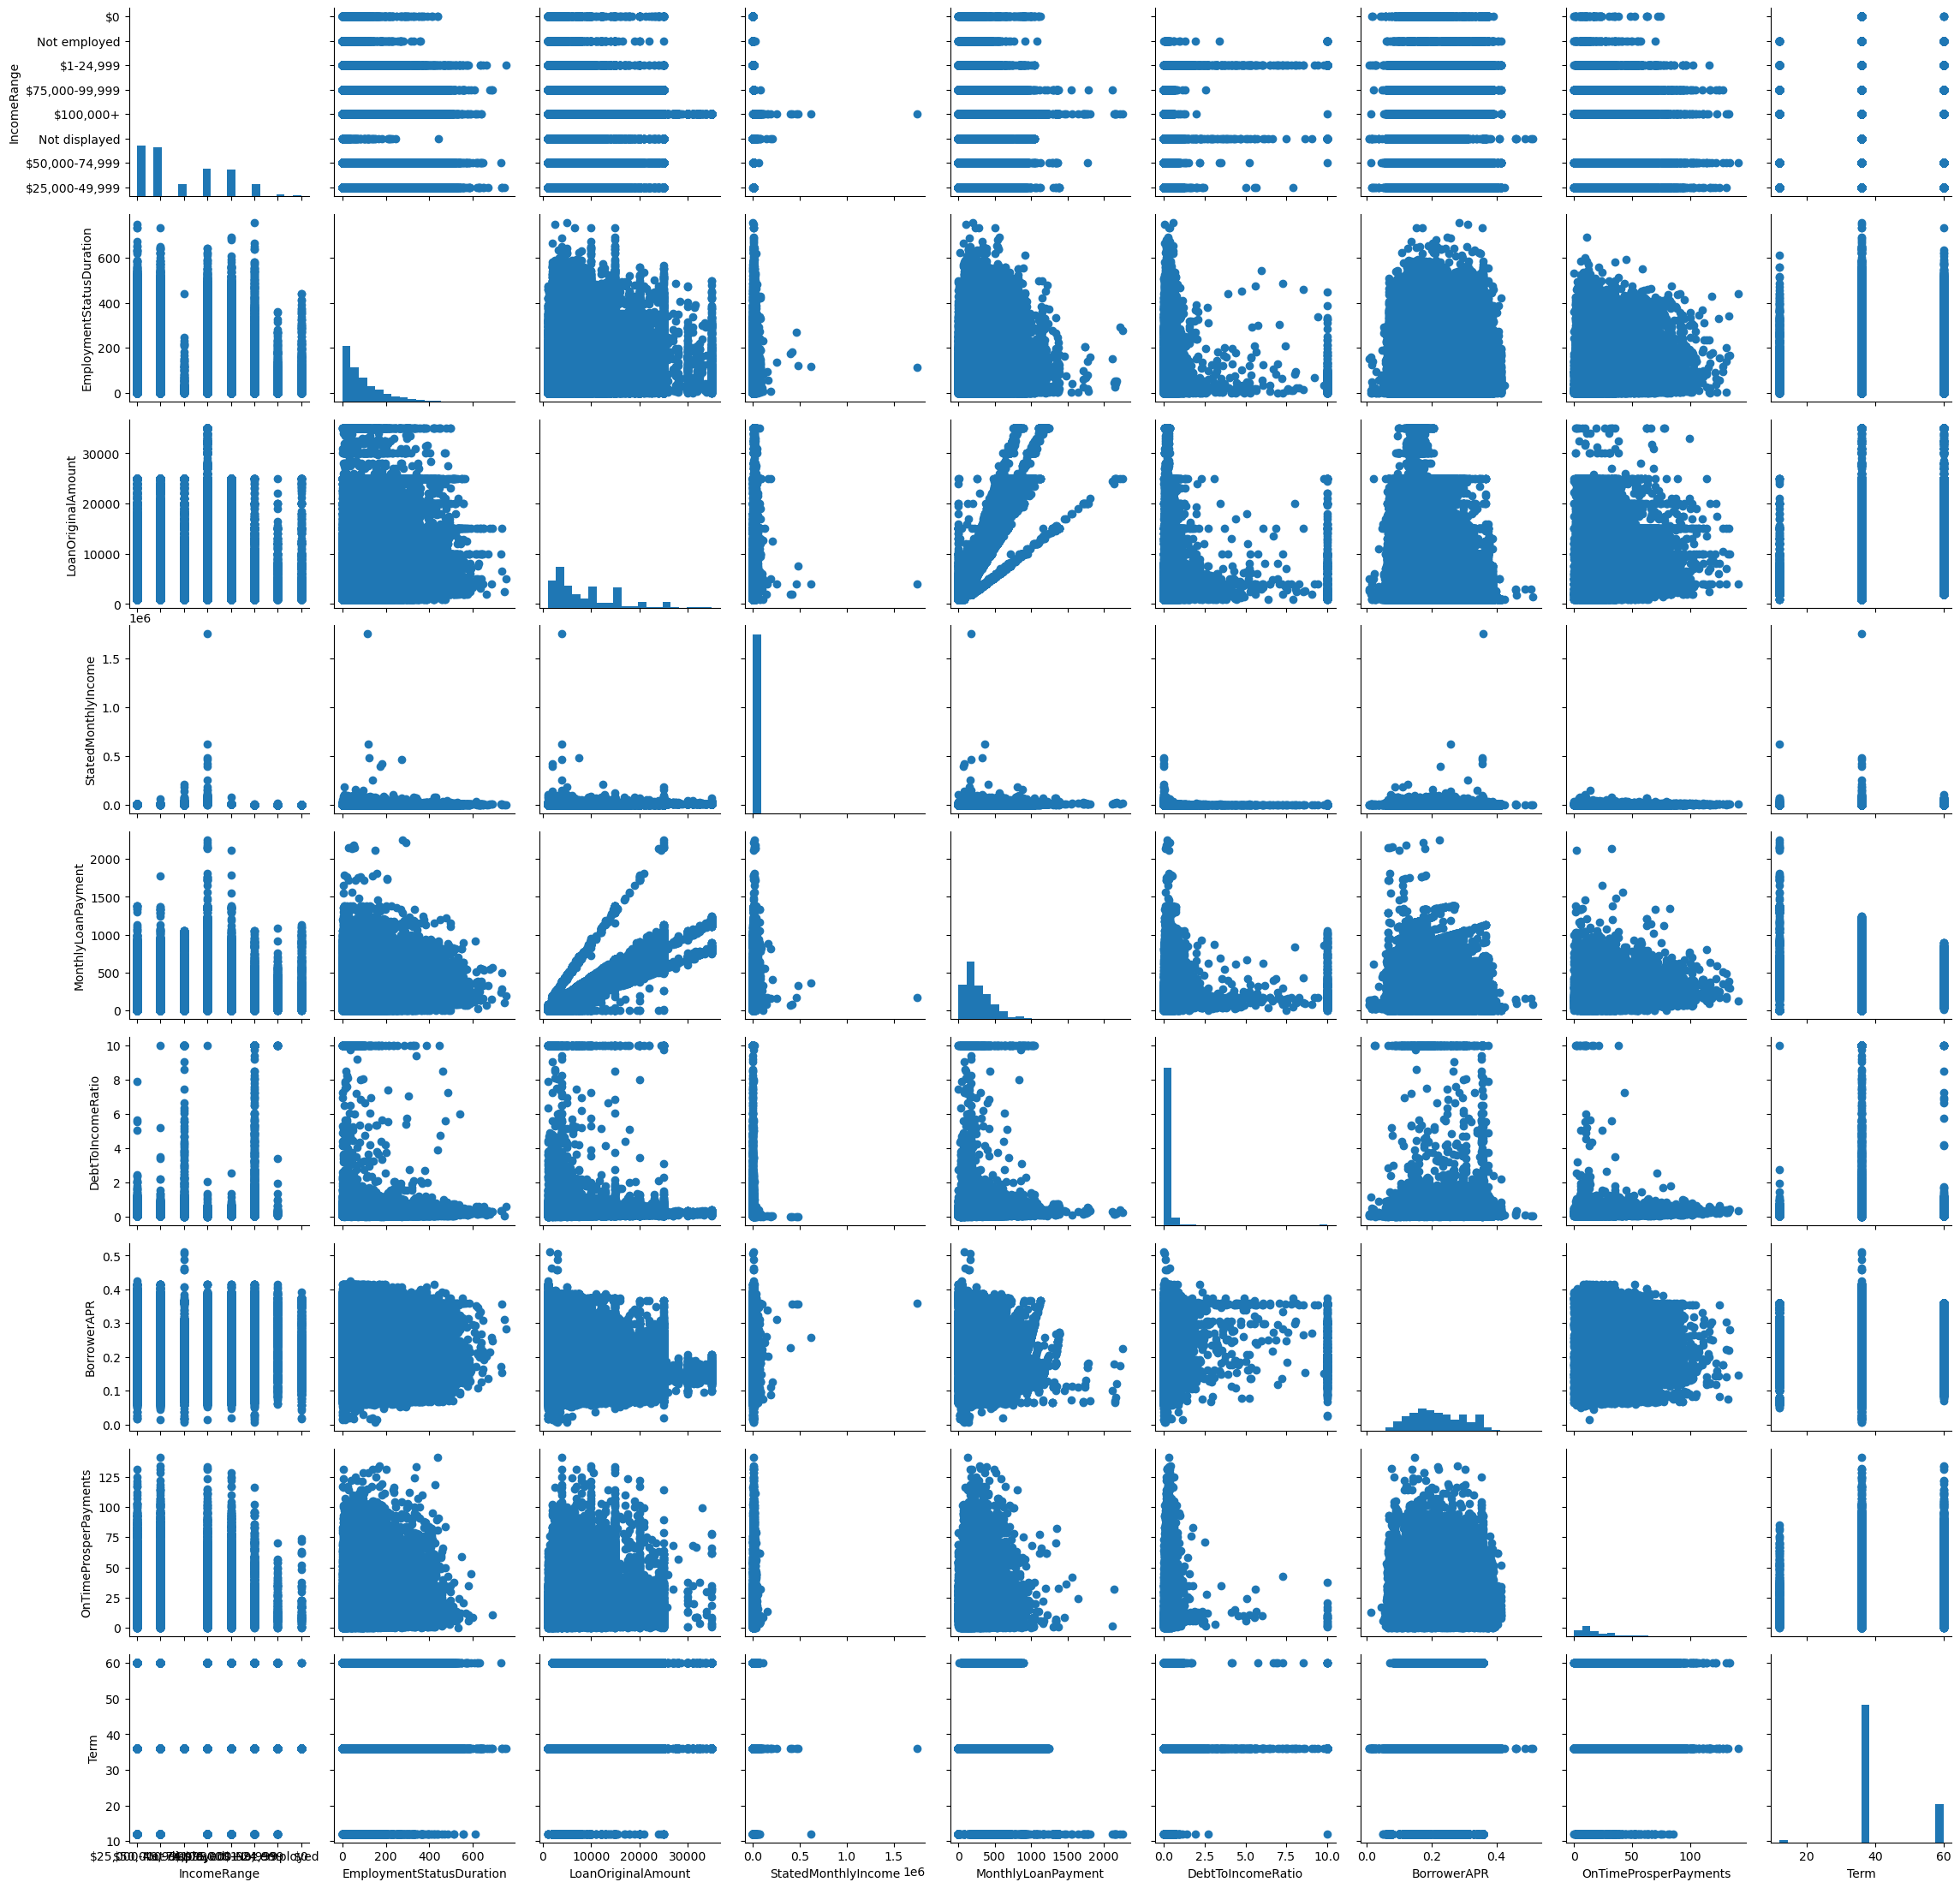

In [17]:
samples = np.random.choice(prosper_loan.shape[0], 500, replace = False)
prosper_loan_samp = prosper_loan.loc[samples,:]

g = sb.PairGrid(data = prosper_loan, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There is a positive correlation between MonthlyLoanPayment and LoanOriginalAmount and a slight positive correlation between Term and LoanOriginalAmount. There are negative correlation between Term and MonthlyLoanPayment, BorrowerAPR and Term and DebtToIncomeRatio and Term.

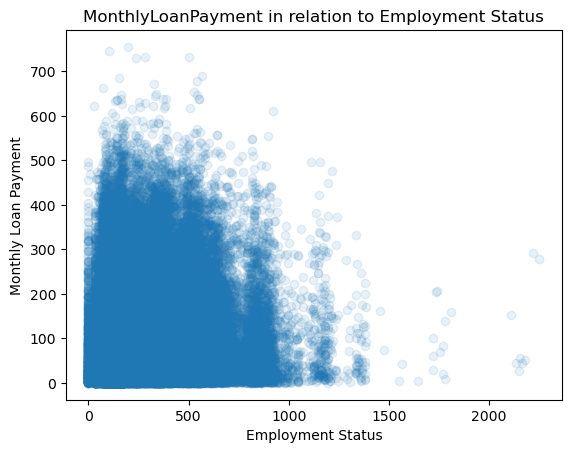

In [18]:
plt.scatter(data = prosper_loan, x = 'MonthlyLoanPayment', y = 'EmploymentStatusDuration', alpha = 1/10)
plt.title('MonthlyLoanPayment in relation to Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Loan Payment');

There is a negative correlation between Monthly Loan Payment and Employment Status

In [19]:
plt.subplot(1,2,2)
sb.boxplot(data = prosper_loan, x = 'ProsperRating (Alpha)', y = 'MonthlyLoanPayment', color = base_color)
plt.title('MonthlyLoanPayment and ProsperRating (Alpha)');

The plot shows that the higher the Rating the more the increase in Monthly Loan Payment.

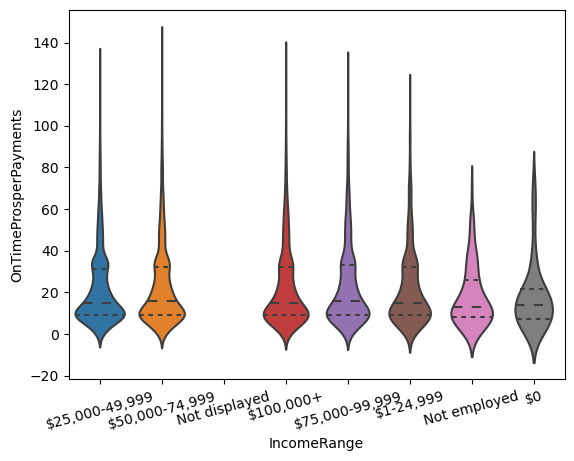

In [20]:
sb.violinplot(data = prosper_loan, x = 'IncomeRange', y = 'OnTimeProsperPayments', inner = 'quartile')
plt.xticks(rotation = 15);

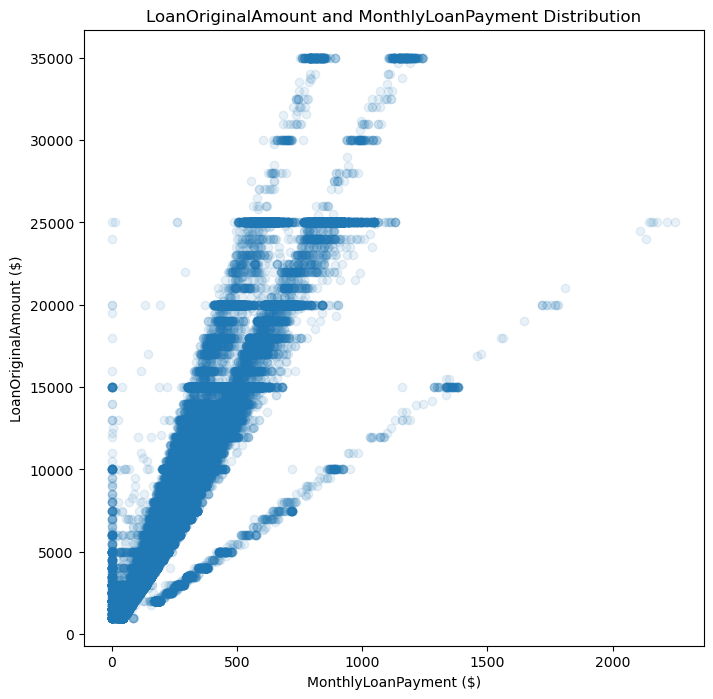

In [21]:
#  A plot of LoanOriginalAmount and MonthlyLoanPayment
plt.figure(figsize = [8,8])
plt.scatter(data = prosper_loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('LoanOriginalAmount ($)')
plt.title('LoanOriginalAmount and MonthlyLoanPayment Distribution');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The Monthly Loan Payment shows a negative correclation with the Borrower Rtae while the IncomeRange showed no correlation with the OnTimeProsperPayments.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

LoanOriginalAmount showed positive correlation with MonthlyLoanPayment.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

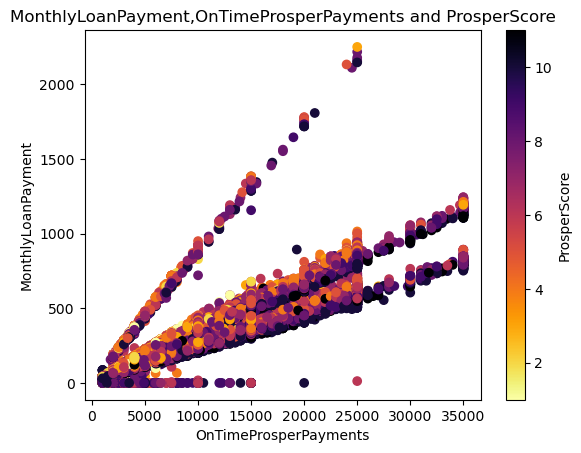

In [22]:
plt.scatter(data = prosper_loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', c = 'ProsperScore', cmap = 'inferno_r')
plt.colorbar(label = 'ProsperScore')
plt.xlabel('OnTimeProsperPayments')
plt.ylabel('MonthlyLoanPayment')
plt.title('MonthlyLoanPayment,OnTimeProsperPayments and ProsperScore');

This distribution shows a strong positive correlation between all variables. As more MonthlyLoanPayment is made it increases the possibility of OnTimeProsperPayment being possible and hence the ProsperScore.

<Figure size 1500x1000 with 0 Axes>

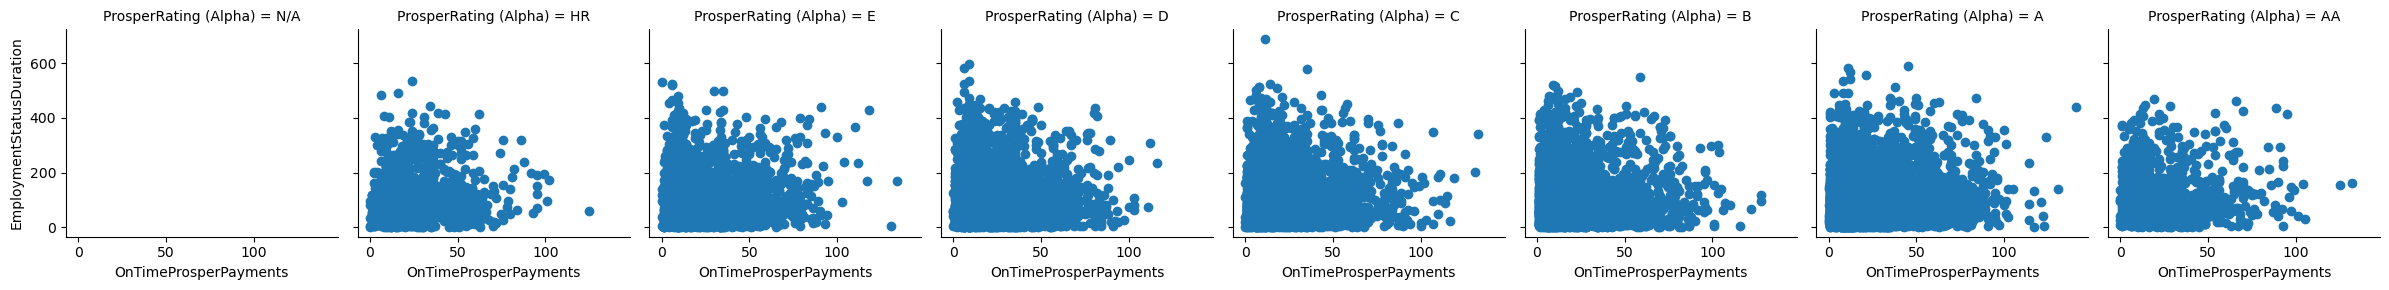

In [23]:
plt.figure(figsize = [15,10])
g = sb.FacetGrid(data = prosper_loan, col = 'ProsperRating (Alpha)', margin_titles = True)
g.map(plt.scatter, 'OnTimeProsperPayments','EmploymentStatusDuration');

The OnTimeProsperPayments across the various ProsperRating(Alpha) showed similar representation with EmploymentStatusDuration.

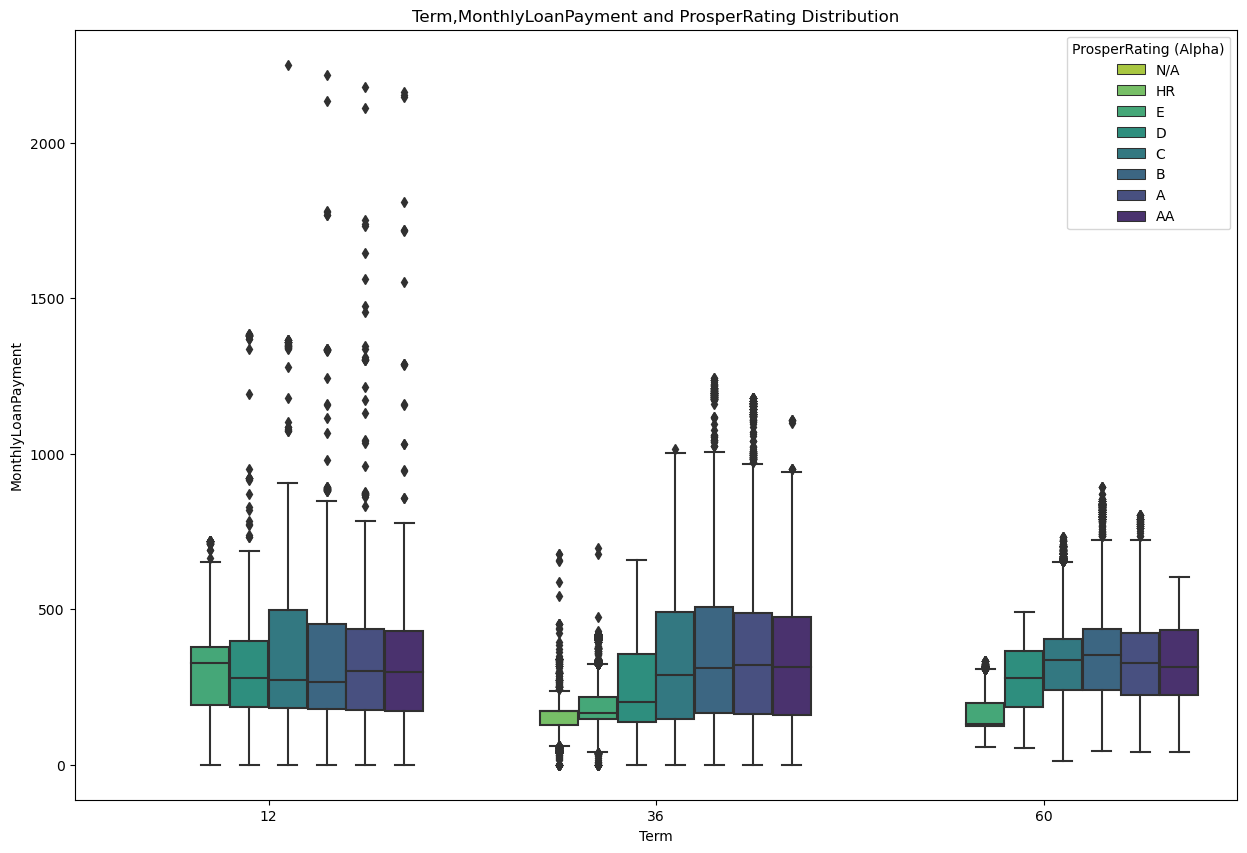

In [24]:
plt.figure(figsize=[15,10])
sb.boxplot(x = 'Term',y = 'MonthlyLoanPayment', hue = 'ProsperRating (Alpha)',data = prosper_loan, palette ='viridis_r')
plt.xlabel('Term')
plt.ylabel('MonthlyLoanPayment')
plt.title('Term,MonthlyLoanPayment and ProsperRating Distribution');

As usual, the distribution confirm an increase in the mean of the MonthlyLoanPayment for 36 months just as the ProsperRating improves and for 12 months Term an increase after the 'C' rating while a retrace for the 60 month Term after 'B' rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There were positive correlation between OnTimeProsperPayments and MonthlyLoanPayment at different levels of ProsperRating.

### Were there any interesting or surprising interactions between features?

As the MonthlyLoanPayment increases, the Terms also increases. I expect the Term to decrease as the MonthlyLoanPayment increases.


## Conclusions

Certain numerical variables('EmploymentStatusDuration','LoanOriginalAmount','MonthlyLoanPayment') and categorical variables ('IncomeRange','ProsperRating (Alpha)') of the ProsperLoan Dataset were analysed to predict the effect on OnTimeProsperPayments. These features showed various levels of correlation with MonthlyLoanPayment showing a better correlation across all ProsperRating.
